In [1]:
# Clculating the accruacy of the prediction / training and testing the data
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

music_data = pd.read_csv('/Users/ethannordman/Desktop/music.csv')

X = music_data.drop(columns=['genre']) # input data set
y = music_data['genre'] # output data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict([ [21, 1], [22, 0]]) # 21 year old male and 22 year old female, this is just a sample of the data being predicted
predictions = model.predict(X_test)

score = accuracy_score (y_test, predictions) # every time you run this it will display a different number because it is running through different combonations of data
score

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.75

In [2]:
# Model Persistence 
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
import joblib

# music_data = pd.read_csv('/Users/ethannordman/Desktop/music.csv')

# X = music_data.drop(columns=['genre'])
# y = music_data['genre']

# model = DecisionTreeClassifier()
# model.fit(X, y)

joblib.load('music-reccomender.joblib') # usejoblib.dump to save the progress in training the model

predicitons = model.predict([[21, 1]])



/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [3]:
# Vizualise the model
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

music_data = pd.read_csv('/Users/ethannordman/Desktop/music.csv')

X = music_data.drop(columns=['genre'])
y = music_data['genre']

model = DecisionTreeClassifier()
model.fit(X, y)

tree.export_graphviz(model, out_file='music-reccommender.dot', feature_names=['age', 'gender'], class_names=sorted(y.unique()), label='all', rounded=True, filled=True)
# After you run this you will get a new .file and you will drag and drop t into vscode in a new window

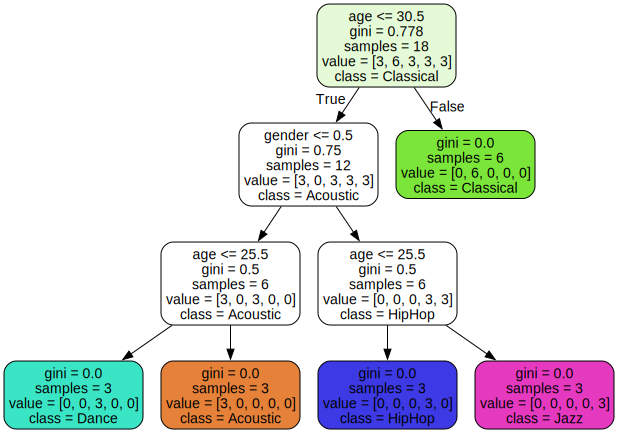

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# After training your model
export_graphviz(
    model, 
    out_file='music-recommender.dot',
    feature_names=['age', 'gender'],
    class_names=sorted(y.unique()), #each name
    label='all',
    rounded=True, # round corners
    filled=True # colors in the boxes
)

# Render and display
with open('music-recommender.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)